**Author:** Samanyu

**Language:** Python

**Accelerator:**: GPU T4 x2

****
# Introduction 
****

**The goal of this notebook is to correctly classify the different types of Beans present**

**If you liked this Notebook or if you found it helpful kindly Upvote :)**

****
# Reading and Displaying the Data
****

In [1]:
# importing
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_excel(r'/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx') # reading
df #Displaying

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


****
# Data Preprocessing and Visualization 
****

**Things we wil do in this section:**

1. Visualize the Distributions of our Features
2. Visualize the Distributions of our Target variable
3. Fill or remove null values if any
4. Drop duplicates
5. Find and remove outliers
6. Apply SMOTE so that the Target variable is perfectly balanced
7. Scale the Features

In [3]:
# importing
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

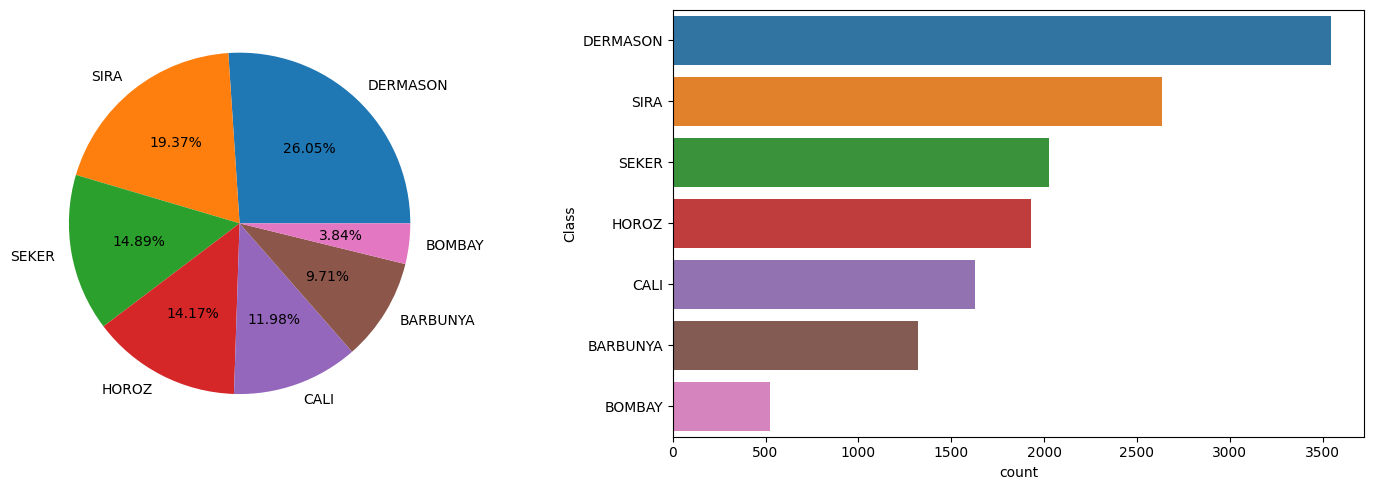

In [5]:
# Let us look at how our features and our target variables are distributed
# First let us look at how our Target variable is distriburted using both Pie chart as well as a Bar Plot

tdf=df['Class'].value_counts().reset_index() # Fidning the counts of each Bean Class in our target variable
fig,ax=plt.subplots(1,2,figsize=(15,5)) # For Subplots
ax[0].pie(labels=tdf['Class'],x=tdf['count'],autopct='%.2f%%') # Pie chart
sns.barplot(data=tdf,y='Class',x='count',ax=ax[1]) # Bar plot
plt.tight_layout()
plt.show()

In [6]:
tdf

,Class,count
0,DERMASON,3546
1,SIRA,2636
2,SEKER,2027
3,HOROZ,1928
4,CALI,1630
5,BARBUNYA,1322
6,BOMBAY,522


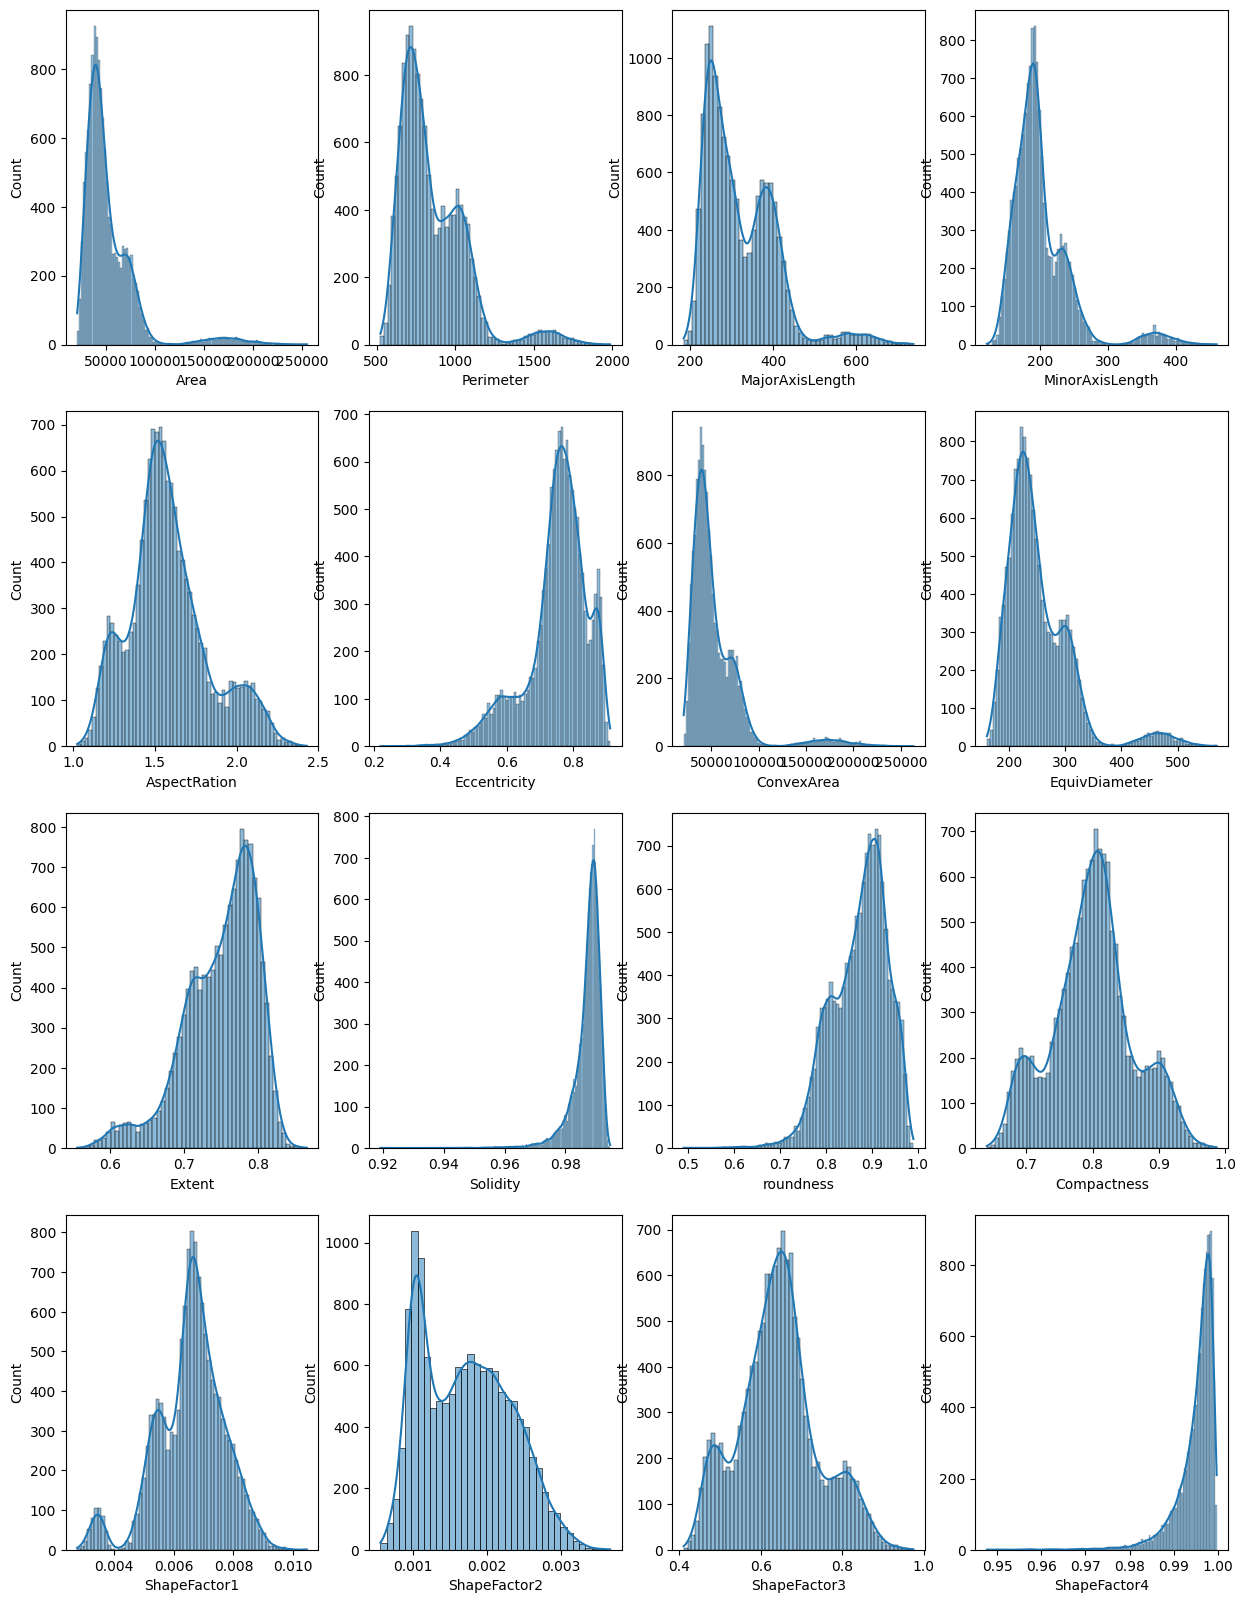

In [7]:
# Not exactly a balanced Dataset lol, let us take care of this later
# Let us look at how our features are distributed
# All our features are Continuous in nature

fig,ax=plt.subplots(4,4,figsize=(15,20)) # 4 X 4 subplots
ax=ax.flatten()
i=0
for col in df.columns[df.columns!='Class']:
    sns.histplot(data=df,x=col,ax=ax[i],kde=True)
    i+=1

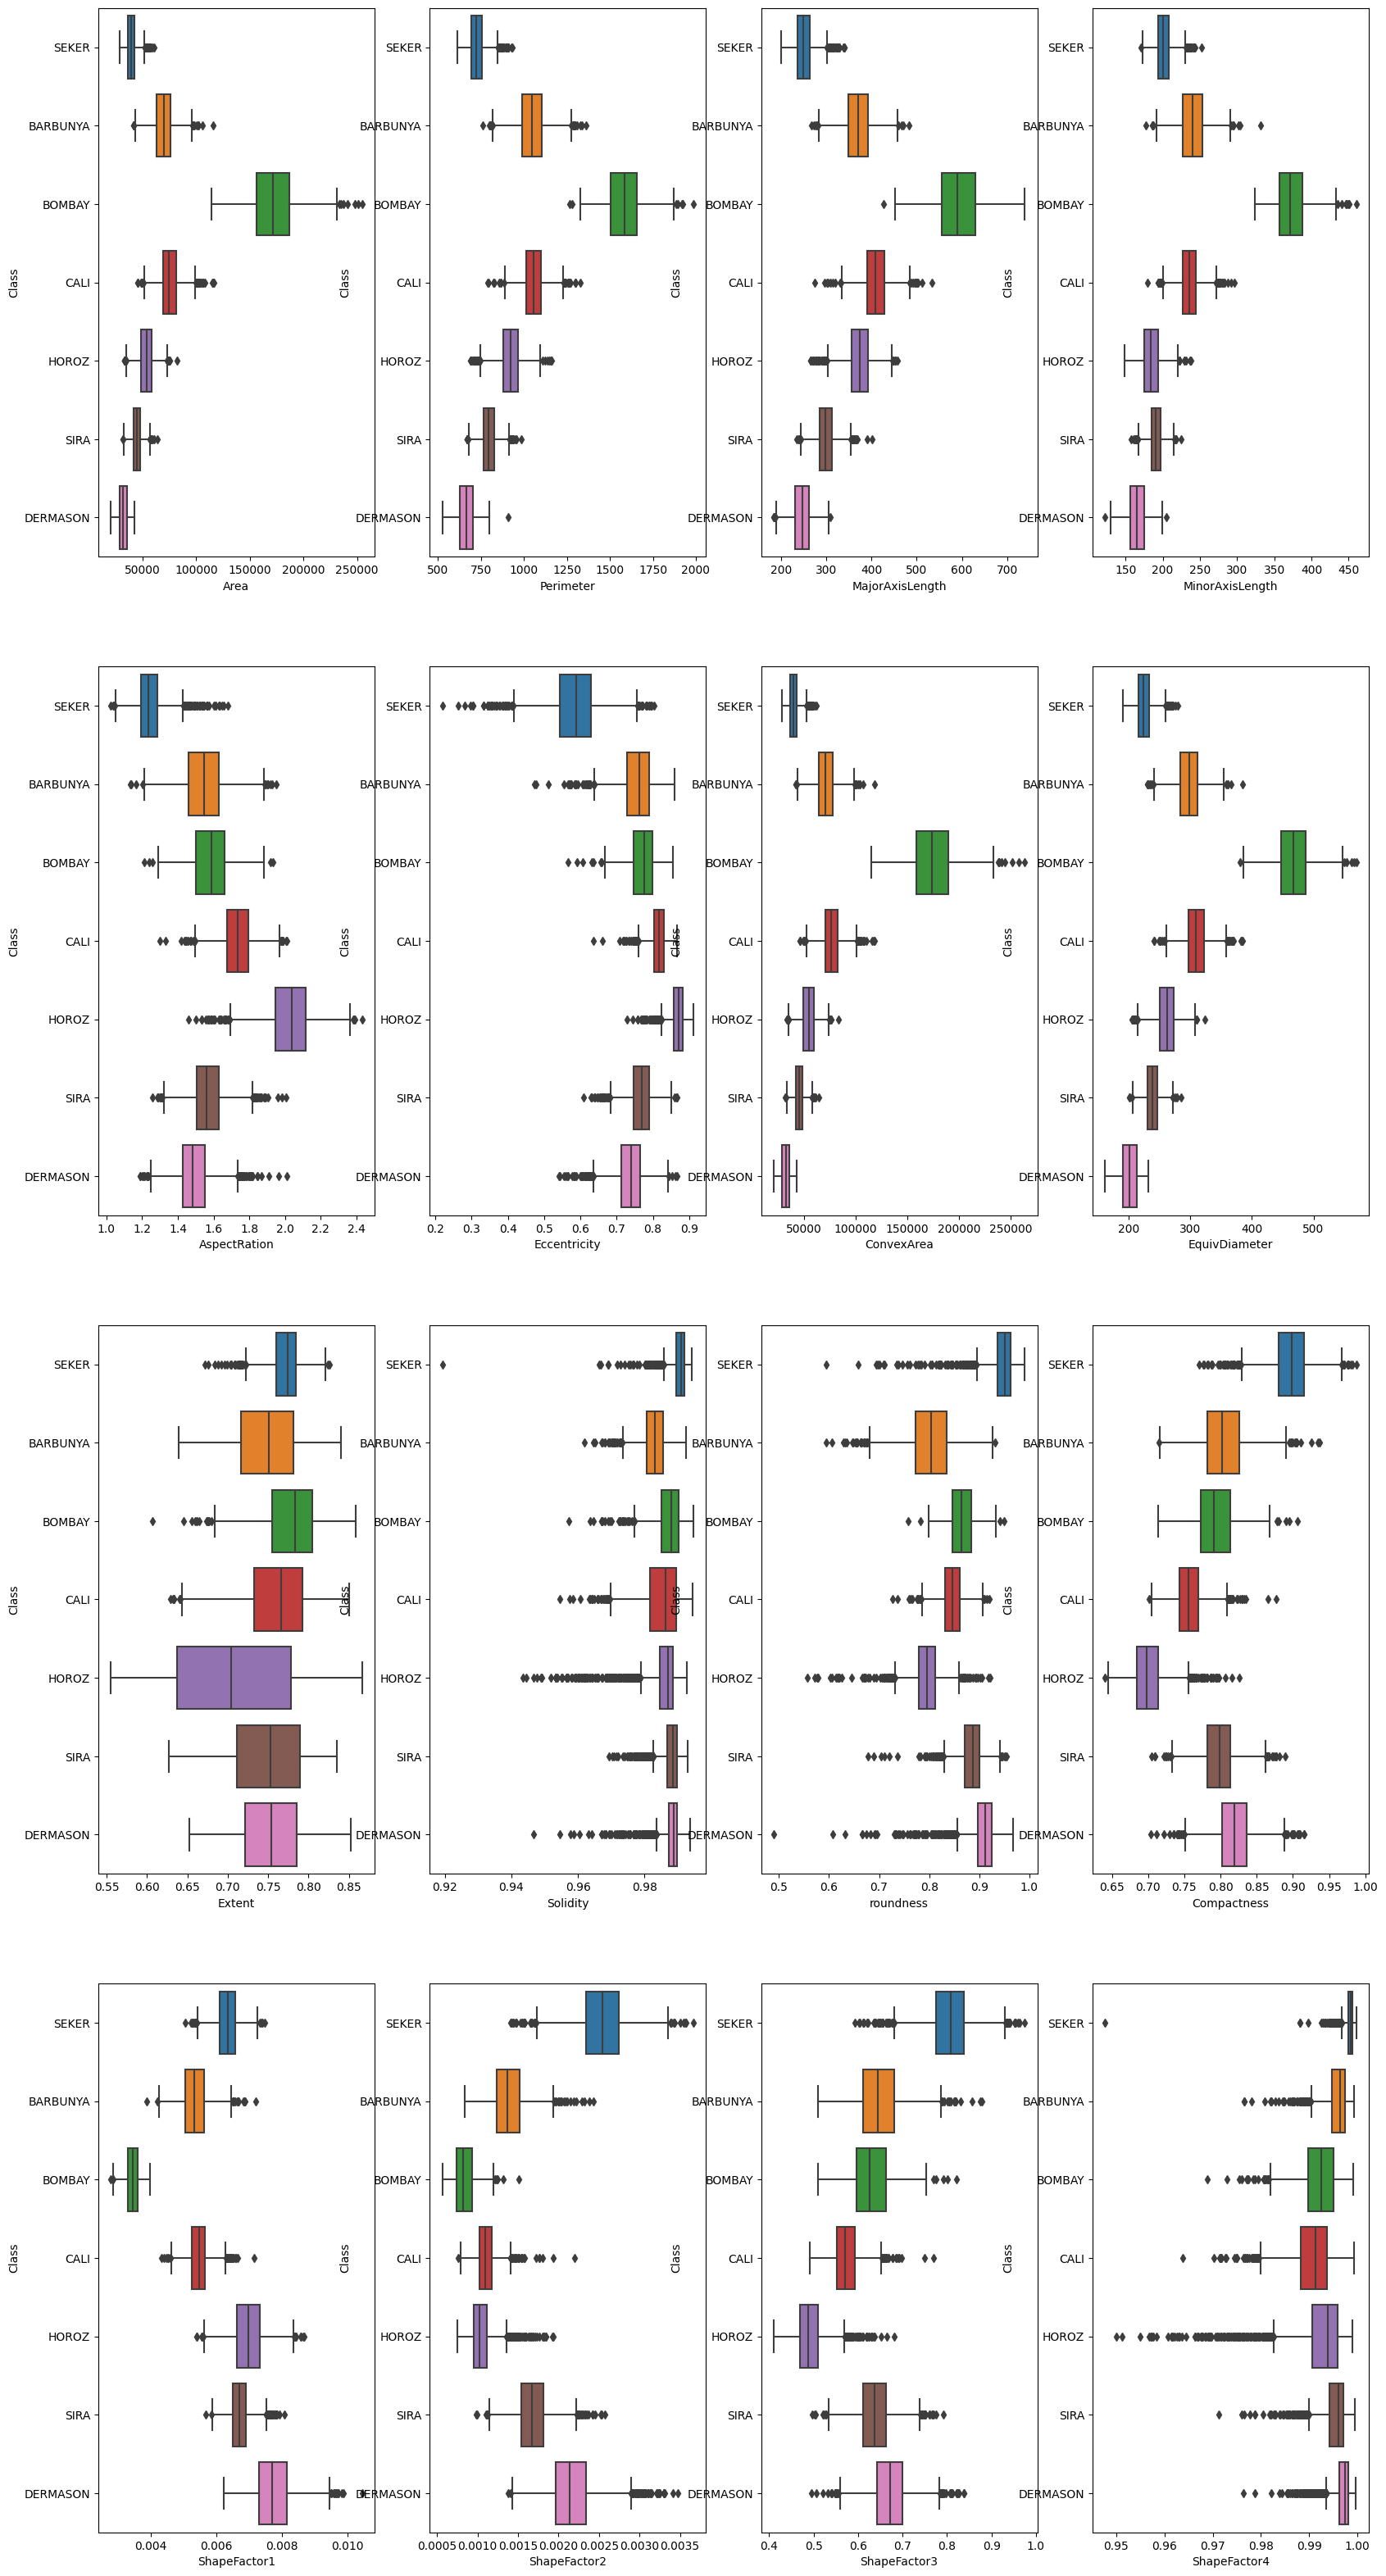

In [8]:
# Some of these features are skewed towards the right or left 
# Some of them are Bimodial or Multimodial in nature as they show multiple peaks
# Scaling of these features may be needed for cetain models
# Let us look at how these features are with respect to each Class (Target variable), we will be using boxplots
fig,ax=plt.subplots(4,4,figsize=(20,40)) # 4 X 4 subplots
ax=ax.flatten()
i=0
for col in df.columns[df.columns!='Class']:
    sns.boxplot(data=df,x=col,ax=ax[i],y='Class')
    i+=1

In [9]:
# Let us now look if there are any null values
df.isnull().any()

Area               False
Perimeter          False
MajorAxisLength    False
MinorAxisLength    False
AspectRation       False
Eccentricity       False
ConvexArea         False
EquivDiameter      False
Extent             False
Solidity           False
roundness          False
Compactness        False
ShapeFactor1       False
ShapeFactor2       False
ShapeFactor3       False
ShapeFactor4       False
Class              False
dtype: bool

In [10]:
# No null values yay :)
# Let us drop duplicates if there are any
df.drop_duplicates(inplace=True,keep='first')

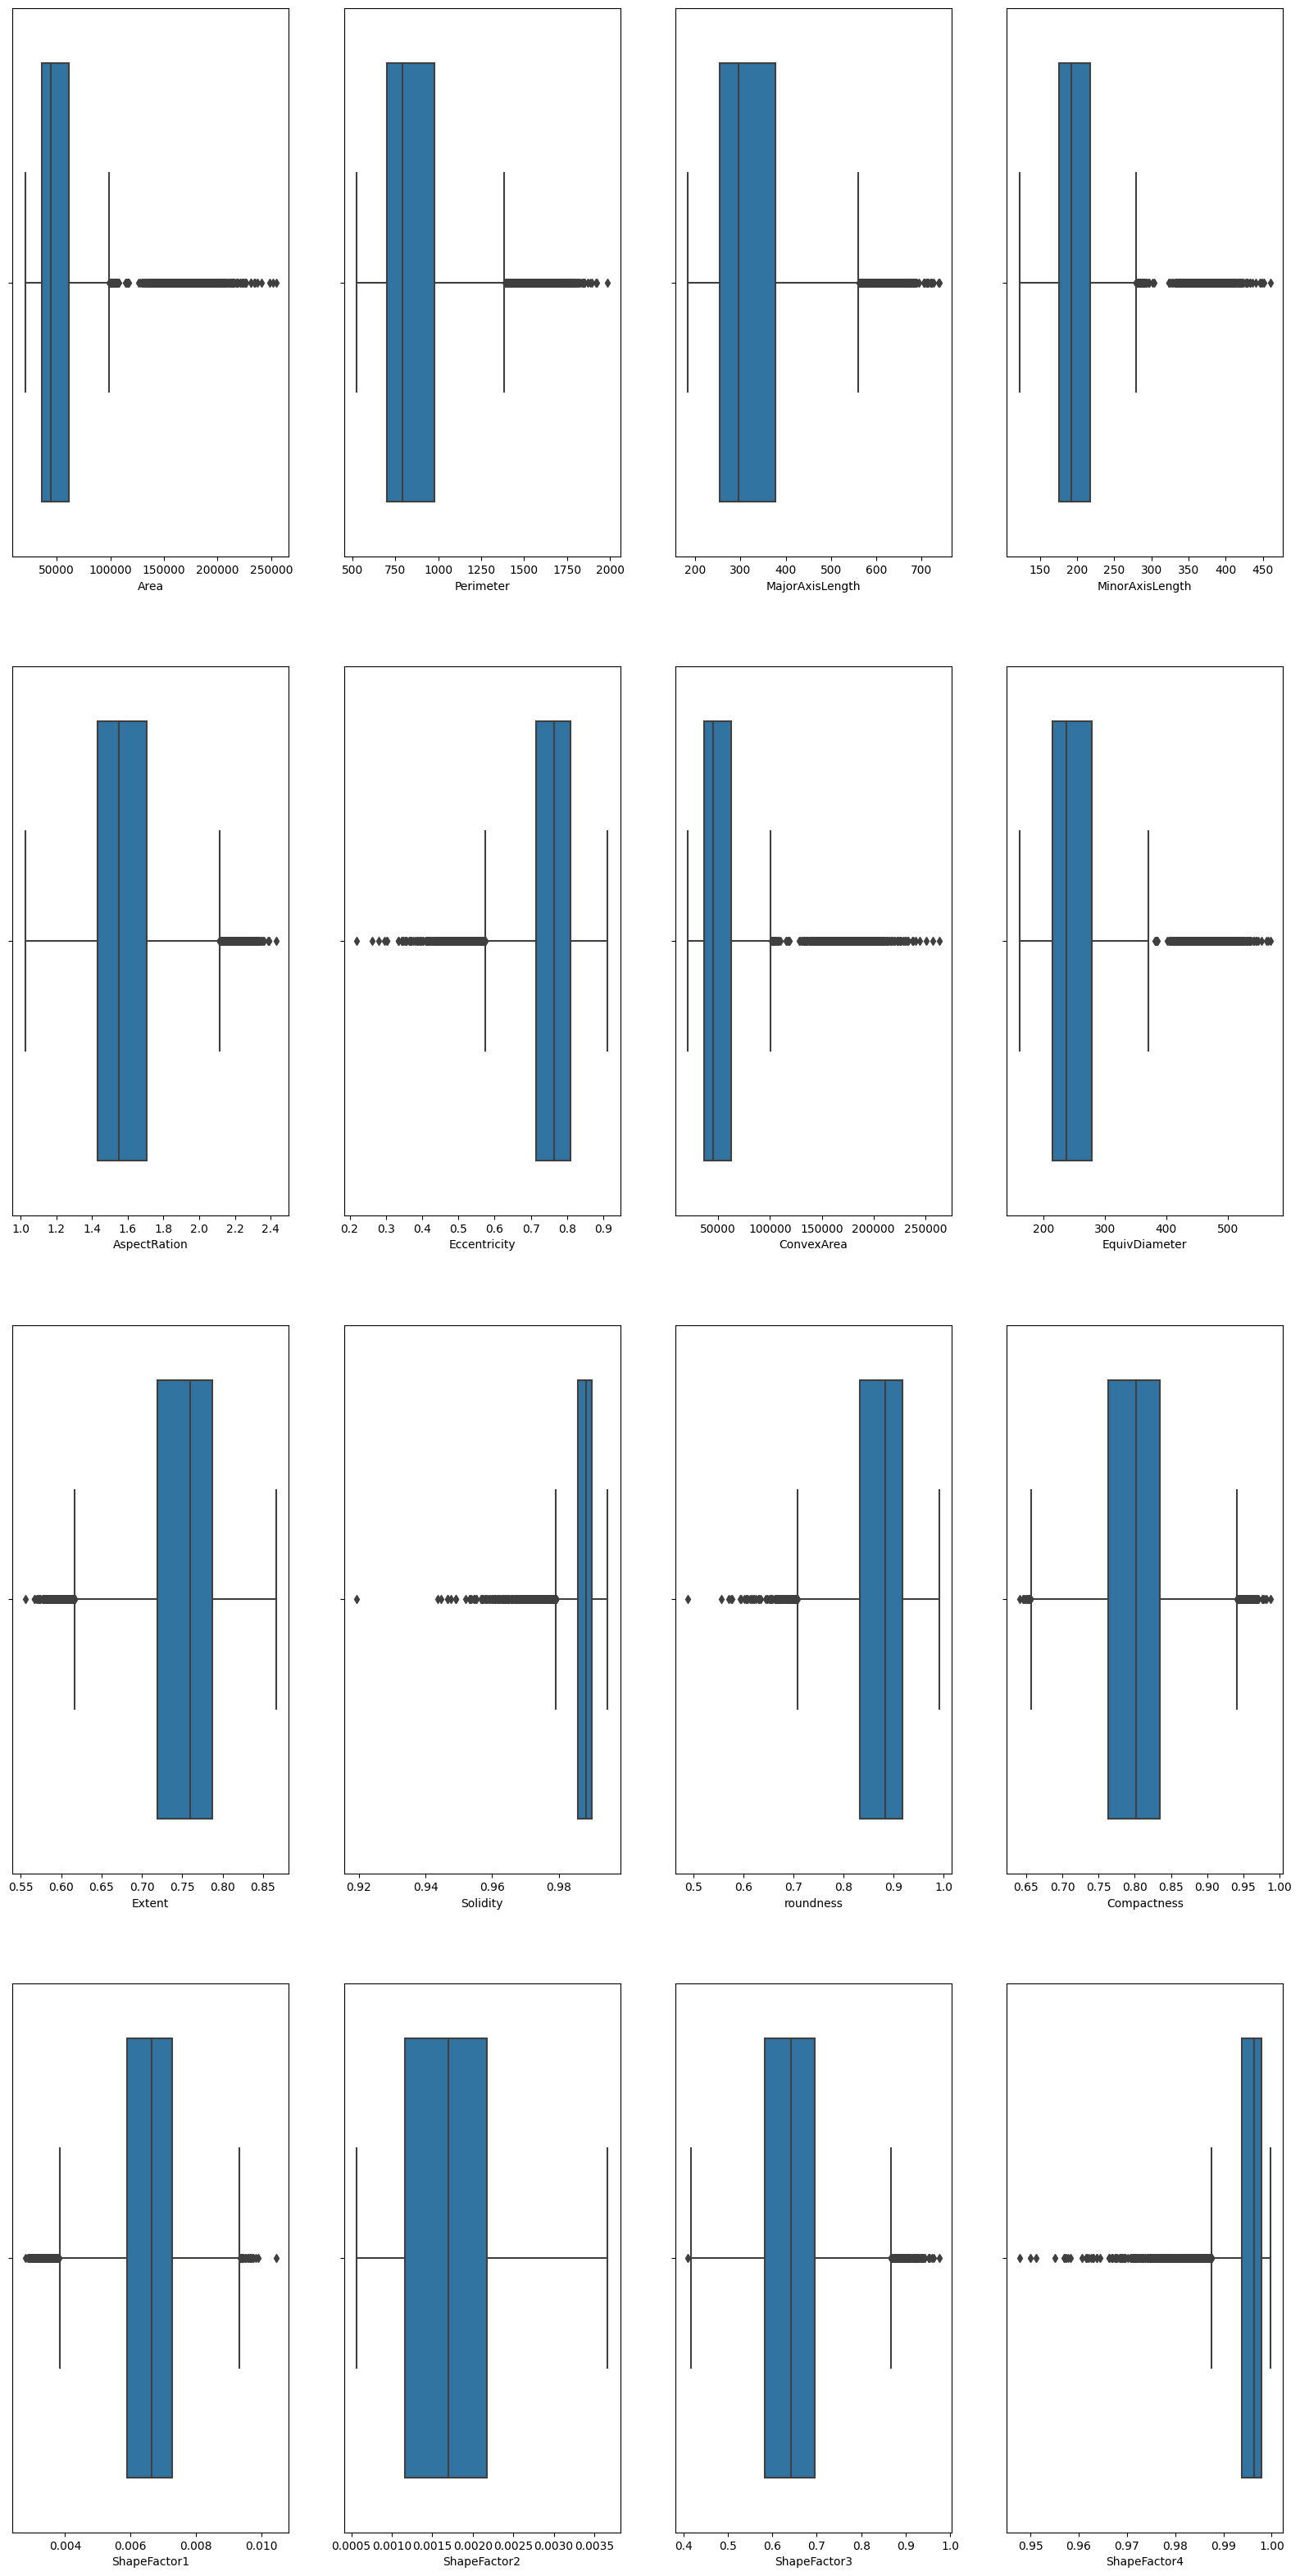

In [11]:
# Let us visualize these features again to check for outliers if there are any
# We might have some as we saw in the previous plots
# We will be using box plots for this

fig,ax=plt.subplots(4,4,figsize=(20,40)) # 4 X 4 subplots
ax=ax.flatten()
i=0
for col in df.columns[df.columns!='Class']:
    sns.boxplot(data=df,x=col,ax=ax[i])
    i+=1

In [12]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [13]:
# We do have a lot of Outliers that requires to be removed
# We will be using Inter Quartile Range to do the job

for col in df.columns[df.columns != 'Class']:
    for c in df['Class'].unique():  # Loop through each class separately
        class_subset = df[df['Class'] == c]  # Filter the class
        q1 = class_subset[col].quantile(0.25)
        q3 = class_subset[col].quantile(0.75)
        iqr = q3 - q1
        lb = q1 - 1.5 * iqr
        ub = q3 + 1.5 * iqr
        df = df[(df[col] >= lb) & (df[col] <= ub) | (df['Class'] != c)]  # Preserve class


In [14]:
# We have removed Outliers
# We have not removed all the outliers, as some might still exist at 3 or 4 times the iqr or if the feature as multiple peaks which we do
# We can use the Z score method for furthur cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11589 entries, 5 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             11589 non-null  int64  
 1   Perimeter        11589 non-null  float64
 2   MajorAxisLength  11589 non-null  float64
 3   MinorAxisLength  11589 non-null  float64
 4   AspectRation     11589 non-null  float64
 5   Eccentricity     11589 non-null  float64
 6   ConvexArea       11589 non-null  int64  
 7   EquivDiameter    11589 non-null  float64
 8   Extent           11589 non-null  float64
 9   Solidity         11589 non-null  float64
 10  roundness        11589 non-null  float64
 11  Compactness      11589 non-null  float64
 12  ShapeFactor1     11589 non-null  float64
 13  ShapeFactor2     11589 non-null  float64
 14  ShapeFactor3     11589 non-null  float64
 15  ShapeFactor4     11589 non-null  float64
 16  Class            11589 non-null  object 
dtypes: float64(14), i

In [15]:
df['Class'].value_counts()

Class
DERMASON    3107
SIRA        2315
SEKER       1651
HOROZ       1482
CALI        1439
BARBUNYA    1139
BOMBAY       456
Name: count, dtype: int64

In [16]:
# Our features are yet to be scaled let us do it afterwards
# First let us split our data into Features and Target
x=df.drop(columns='Class')
y=df['Class']

In [17]:
y.value_counts()

Class
DERMASON    3107
SIRA        2315
SEKER       1651
HOROZ       1482
CALI        1439
BARBUNYA    1139
BOMBAY       456
Name: count, dtype: int64

In [18]:
# Let us apply SMOTE to balace the classes
# importing 
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto',random_state=20) # Balancing all classes equally
xr,yr=smote.fit_resample(x,y) # Resampling
ndf=pd.DataFrame(xr,columns=x.columns) # Creating new dataframe 
ndf['Class']=yr
print(ndf['Class'].value_counts())

Class
SEKER       3107
BARBUNYA    3107
BOMBAY      3107
CALI        3107
HOROZ       3107
SIRA        3107
DERMASON    3107
Name: count, dtype: int64


In [19]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21749 entries, 0 to 21748
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             21749 non-null  int64  
 1   Perimeter        21749 non-null  float64
 2   MajorAxisLength  21749 non-null  float64
 3   MinorAxisLength  21749 non-null  float64
 4   AspectRation     21749 non-null  float64
 5   Eccentricity     21749 non-null  float64
 6   ConvexArea       21749 non-null  int64  
 7   EquivDiameter    21749 non-null  float64
 8   Extent           21749 non-null  float64
 9   Solidity         21749 non-null  float64
 10  roundness        21749 non-null  float64
 11  Compactness      21749 non-null  float64
 12  ShapeFactor1     21749 non-null  float64
 13  ShapeFactor2     21749 non-null  float64
 14  ShapeFactor3     21749 non-null  float64
 15  ShapeFactor4     21749 non-null  float64
 16  Class            21749 non-null  object 
dtypes: float64(1

In [20]:
# Let us Scale the data
# importing 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
feature_cols = ndf.columns[ndf.columns != 'Class']
ndf[feature_cols] = ss.fit_transform(ndf[feature_cols])

In [21]:
for col in ndf.columns[ndf.columns!='Class']:
    print(col,'--->','Mean: ',ndf[col].mean(),'SD: ',ndf[col].std())

Area ---> Mean:  -6.272665652027184e-17 SD:  1.0000229903555478
Perimeter ---> Mean:  -3.7635993912163107e-16 SD:  1.0000229903555486
MajorAxisLength ---> Mean:  -1.2545331304054368e-16 SD:  1.0000229903555518
MinorAxisLength ---> Mean:  2.9272439709460196e-16 SD:  1.00002299035555
AspectRation ---> Mean:  7.840832065033981e-17 SD:  1.000022990355551
Eccentricity ---> Mean:  -8.99082076790563e-16 SD:  1.0000229903555502
ConvexArea ---> Mean:  -6.272665652027184e-17 SD:  1.000022990355547
EquivDiameter ---> Mean:  1.4636219854730098e-16 SD:  1.0000229903555524
Extent ---> Mean:  1.8817996956081553e-16 SD:  1.000022990355549
Solidity ---> Mean:  2.5142934821875632e-15 SD:  1.000022990355547
roundness ---> Mean:  2.1222518789358643e-15 SD:  1.0000229903555484
Compactness ---> Mean:  3.9360976966470586e-15 SD:  1.0000229903555442
ShapeFactor1 ---> Mean:  8.363554202702913e-17 SD:  1.0000229903555489
ShapeFactor2 ---> Mean:  4.599954811486602e-16 SD:  1.0000229903555498
ShapeFactor3 ---> Me

In [22]:
# Let us encode our Target variable
# importing 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ndf['Class']=le.fit_transform(ndf['Class'])

In [23]:
ndf['Class'].value_counts()

Class
5    3107
0    3107
1    3107
2    3107
4    3107
6    3107
3    3107
Name: count, dtype: int64

In [24]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21749 entries, 0 to 21748
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             21749 non-null  float64
 1   Perimeter        21749 non-null  float64
 2   MajorAxisLength  21749 non-null  float64
 3   MinorAxisLength  21749 non-null  float64
 4   AspectRation     21749 non-null  float64
 5   Eccentricity     21749 non-null  float64
 6   ConvexArea       21749 non-null  float64
 7   EquivDiameter    21749 non-null  float64
 8   Extent           21749 non-null  float64
 9   Solidity         21749 non-null  float64
 10  roundness        21749 non-null  float64
 11  Compactness      21749 non-null  float64
 12  ShapeFactor1     21749 non-null  float64
 13  ShapeFactor2     21749 non-null  float64
 14  ShapeFactor3     21749 non-null  float64
 15  ShapeFactor4     21749 non-null  float64
 16  Class            21749 non-null  int64  
dtypes: float64(1

****
# Correlation and Mutual Information
****

In [25]:
# importing 
from sklearn.feature_selection import mutual_info_classif

In [26]:
# calculating Mutual information
x=ndf.drop(columns='Class')
y=ndf['Class']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Mutual Information':mi,'Features':x.columns})
mi_df.sort_values(by='Mutual Information',ascending=False,inplace=True)

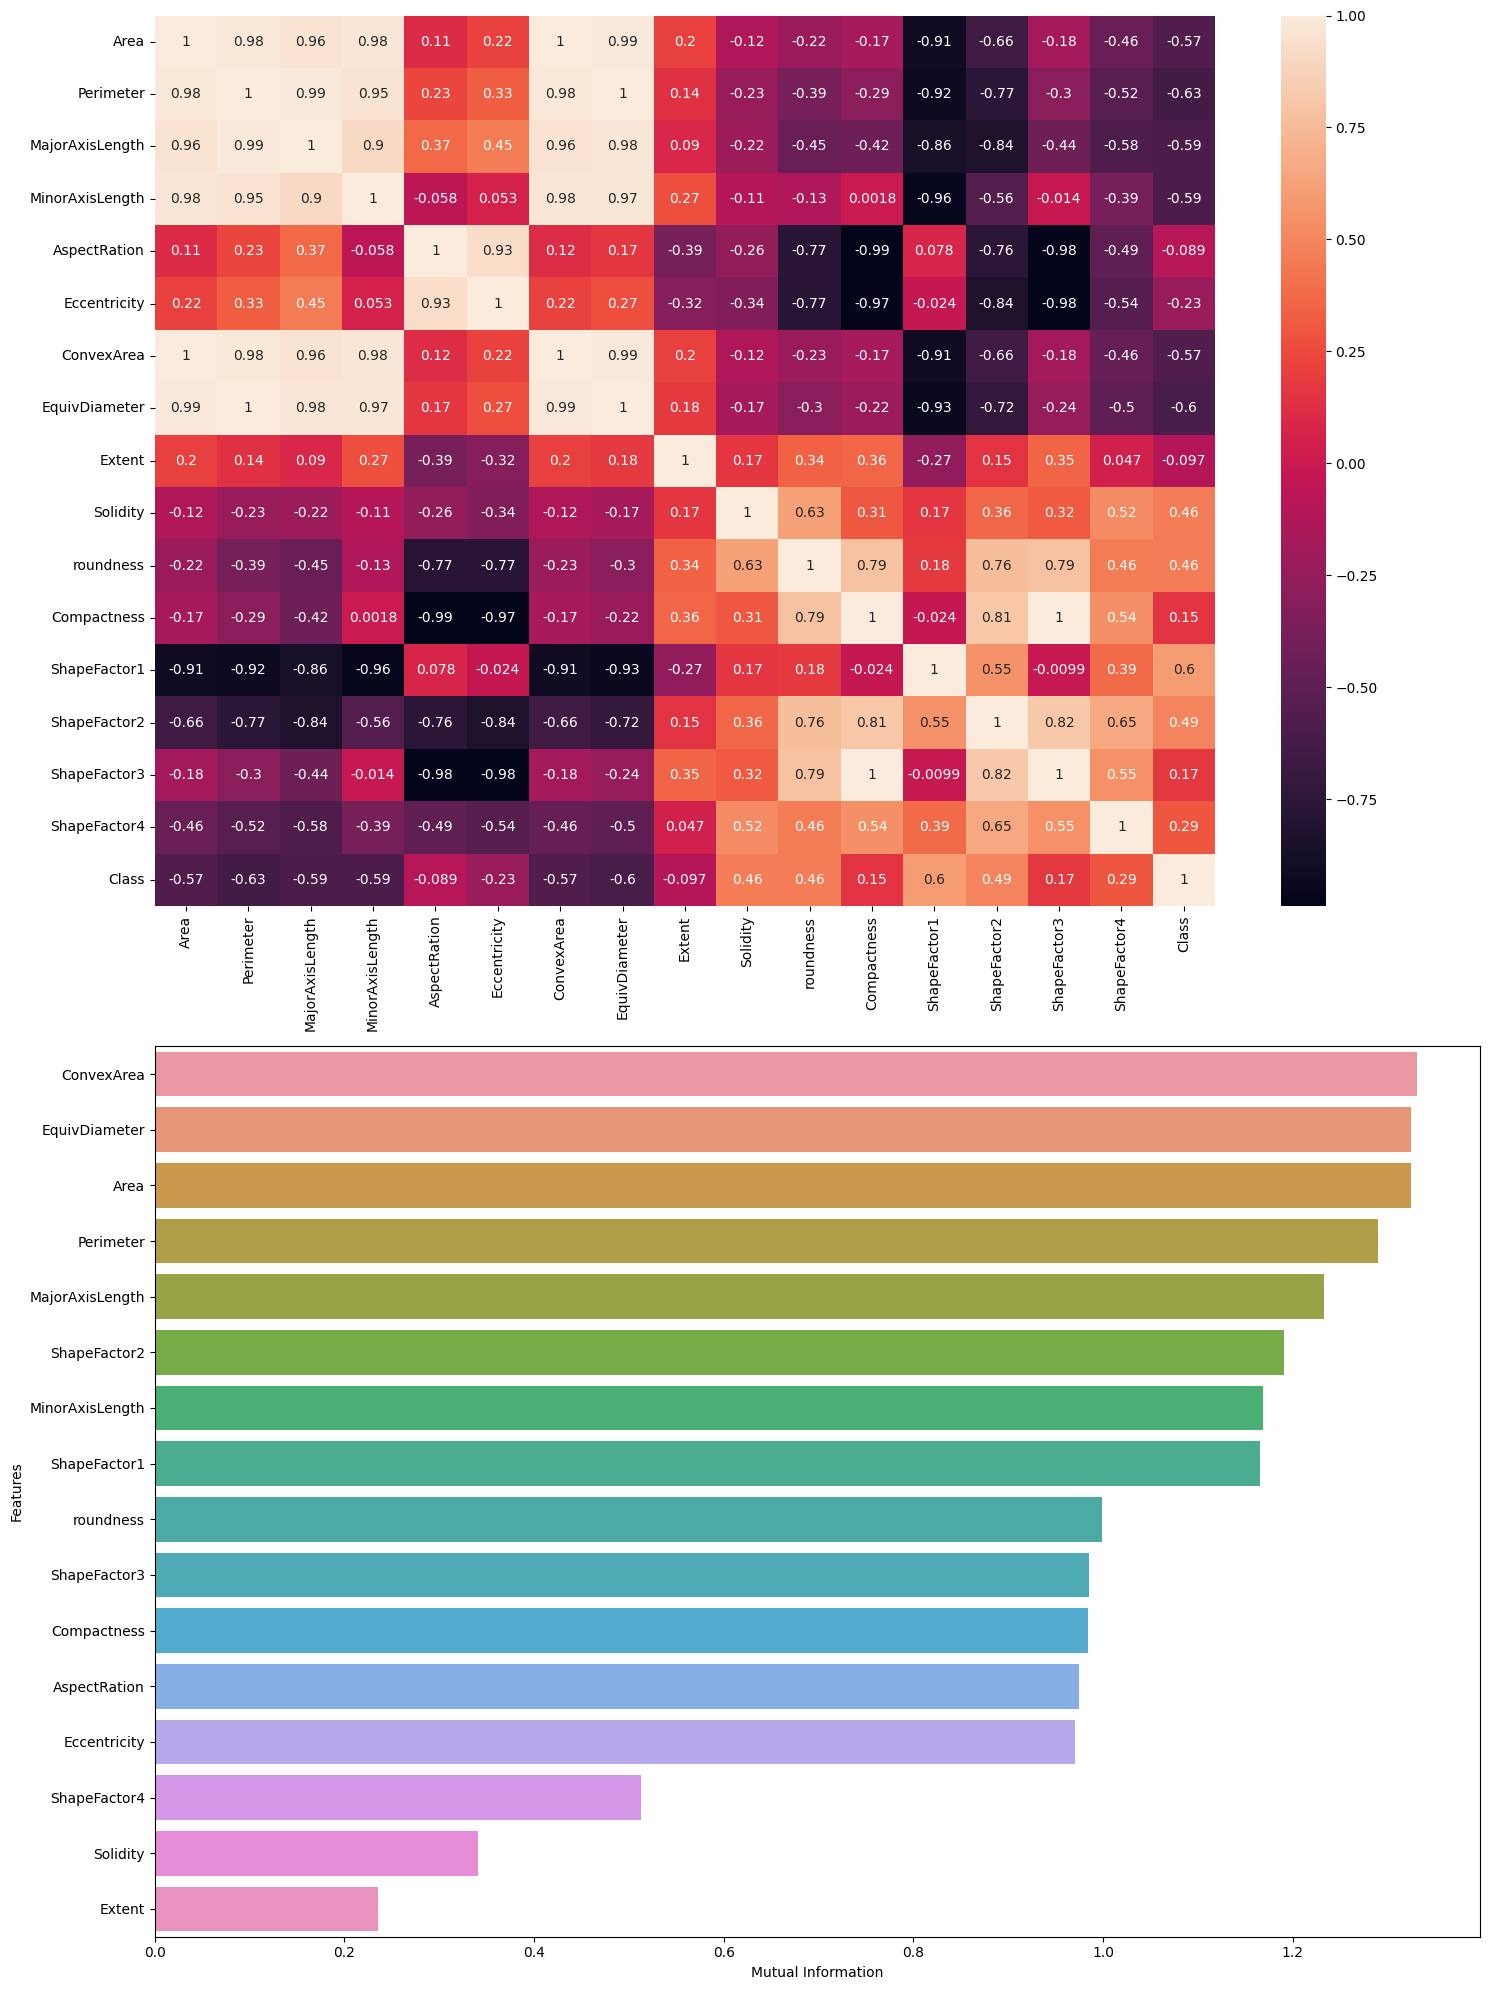

In [27]:
# Visualize correlation and Mutual Information
fig,ax=plt.subplots(2,1,figsize=(15,20))
sns.heatmap(ndf.corr(),annot=True,ax=ax[0])
sns.barplot(data=mi_df,x='Mutual Information',y='Features')
plt.tight_layout()
plt.show()

****
# Data Preparation
****

In [28]:
# importing
from sklearn.model_selection import train_test_split
x=ndf.drop(columns='Class')
y=ndf['Class']
x_t,x_te,y_t,y_te=train_test_split(x,y,random_state=20,test_size=0.2,stratify=y)

****
# Models 
****

In [29]:
# importing

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

import keras as k
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.callbacks import Callback

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_curve, auc,roc_auc_score

In [30]:
at=[]
a=[]
pt=[]
p=[]
rt=[]
r=[]
f1t=[]
f1=[]
crt=[]
cr=[]
cmt=[]
cm=[]
roc_auc_t=[]
roc_auc=[]

## Decision Tree

In [31]:
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas

params={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',random_state=20)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ba=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 0.00010058049313178919}
0.9639638648185971


In [32]:
dt=DecisionTreeClassifier(ccp_alpha=ba)
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,101)),'min_samples_leaf':list(np.arange(2,101)),
       'max_features':['sqrt','log2',None]}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',random_state=20)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_

{'min_samples_split': 21, 'min_samples_leaf': 29, 'max_features': None, 'criterion': 'gini'}
0.9555725975425169


In [33]:
predt=ndt.predict(x_t)
pred=ndt.predict(x_te)

In [34]:
at.append(accuracy_score(y_t,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y_t, predt, average="weighted"))
p.append(precision_score(y_te, pred, average="weighted"))
rt.append(recall_score(y_t, predt, average="weighted"))
r.append(recall_score(y_te, pred, average="weighted"))
f1t.append(f1_score(y_t, predt, average="weighted"))
f1.append(f1_score(y_te, pred, average="weighted"))
crt.append(classification_report(y_t,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))

## Random Forest

In [35]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51)),
       'max_features':['sqrt','log2',None],'n_estimators':[100]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',random_state=20)
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 100, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'log2', 'criterion': 'entropy'}
0.9713776579220454


In [36]:
predt=nrf.predict(x_t)
pred=nrf.predict(x_te)

In [37]:
at.append(accuracy_score(y_t,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y_t, predt, average="weighted"))
p.append(precision_score(y_te, pred, average="weighted"))
rt.append(recall_score(y_t, predt, average="weighted"))
r.append(recall_score(y_te, pred, average="weighted"))
f1t.append(f1_score(y_t, predt, average="weighted"))
f1.append(f1_score(y_te, pred, average="weighted"))
crt.append(classification_report(y_t,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))


## AdaBoost


In [38]:
ada=AdaBoostClassifier(algorithm='SAMME')
params={
    'n_estimators': [100],
    'learning_rate': np.arange(0.01, 2.01, 0.01),}

nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)
nada=nada.best_estimator_

{'n_estimators': 100, 'learning_rate': 1.17}
0.8423429702629995


In [39]:
predt=nada.predict(x_t)
pred=nada.predict(x_te)

In [40]:
at.append(accuracy_score(y_t,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y_t, predt, average="weighted"))
p.append(precision_score(y_te, pred, average="weighted"))
rt.append(recall_score(y_t, predt, average="weighted"))
r.append(recall_score(y_te, pred, average="weighted"))
f1t.append(f1_score(y_t, predt, average="weighted"))
f1.append(f1_score(y_te, pred, average="weighted"))
crt.append(classification_report(y_t,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))

## GradientBoost

In [41]:
gb=GradientBoostingClassifier()
params={'n_estimators': [20], 'learning_rate': np.arange(0.01, 2.01, 0.01),'min_samples_split':list(np.arange(2,51))
        ,'subsample': [0.5, 0.8, 1.0],'max_features':['sqrt','log2',None]}
ngb=RandomizedSearchCV(gb,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ngb.fit(x_t ,y_t)
print(ngb.best_params_)
print(ngb.best_score_)

{'subsample': 1.0, 'n_estimators': 20, 'min_samples_split': 40, 'max_features': 'sqrt', 'learning_rate': 0.67}
0.9671821564778277


In [42]:
ngb=ngb.best_estimator_
predt=ngb.predict(x_t)
pred=ngb.predict(x_te)

In [43]:
at.append(accuracy_score(y_t,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y_t, predt, average="weighted"))
p.append(precision_score(y_te, pred, average="weighted"))
rt.append(recall_score(y_t, predt, average="weighted"))
r.append(recall_score(y_te, pred, average="weighted"))
f1t.append(f1_score(y_t, predt, average="weighted"))
f1.append(f1_score(y_te, pred, average="weighted"))
crt.append(classification_report(y_t,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))

## XGBoost

In [44]:
xgb = XGBClassifier()
params= {
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'n_estimators': [50],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
    'scale_pos_weight': [1, 2, 3]
}
nxgb=RandomizedSearchCV(xgb,cv=10,scoring='accuracy',n_jobs=-1,param_distributions=params)
nxgb.fit(x_t,y_t)
print(nxgb.best_params_)
print(nxgb.best_score_)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:04:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


{'subsample': 0.6, 'scale_pos_weight': 3, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.8}
0.9734467556331093


In [45]:
nxgb=nxgb.best_estimator_
predt=nxgb.predict(x_t)
pred=nxgb.predict(x_te)

In [46]:
at.append(accuracy_score(y_t,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y_t, predt, average="weighted"))
p.append(precision_score(y_te, pred, average="weighted"))
rt.append(recall_score(y_t, predt, average="weighted"))
r.append(recall_score(y_te, pred, average="weighted"))
f1t.append(f1_score(y_t, predt, average="weighted"))
f1.append(f1_score(y_te, pred, average="weighted"))
crt.append(classification_report(y_t,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))

## ANN

In [47]:
model=Sequential()
model.add(Dense(256, activation='relu', input_dim=16))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
opt=k.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch + 1}: {logs}")

modelh = model.fit(x_t, y_t, epochs=200, verbose=0, callbacks=[CustomCallback()])
pred_probs = model.predict(x_te)
pred = pred_probs.argmax(axis=1)  
pred_probs_t = model.predict(x_t)
predt = pred_probs_t.argmax(axis=1) 

Epoch 50: {'accuracy': 0.9613770842552185, 'loss': 0.10037322342395782}
Epoch 100: {'accuracy': 0.9653428196907043, 'loss': 0.09378409385681152}
Epoch 150: {'accuracy': 0.9681016206741333, 'loss': 0.08331900089979172}
Epoch 200: {'accuracy': 0.9676418304443359, 'loss': 0.08230230212211609}
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [50]:
at.append(accuracy_score(y_t,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y_t, predt, average="weighted"))
p.append(precision_score(y_te, pred, average="weighted"))
rt.append(recall_score(y_t, predt, average="weighted"))
r.append(recall_score(y_te, pred, average="weighted"))
f1t.append(f1_score(y_t, predt, average="weighted"))
f1.append(f1_score(y_te, pred, average="weighted"))
crt.append(classification_report(y_t,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))

****
# Evaluation Metrics
****

## Training

In [51]:
mods=['Decision Tree','Random Forest','AdaBoost','GradientBoost','XGBoost','ANN']
print('CLASSIFICATION REPORTS:\n\n\n')
for m,c in zip(mods,crt):
    print(m,'\n',c,'\n\n')

CLASSIFICATION REPORTS:



Decision Tree 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      2486
           1       1.00      1.00      1.00      2486
           2       0.96      0.97      0.96      2485
           3       0.93      0.93      0.93      2485
           4       0.99      0.99      0.99      2485
           5       0.98      0.98      0.98      2486
           6       0.92      0.93      0.93      2486

    accuracy                           0.97     17399
   macro avg       0.97      0.97      0.97     17399
weighted avg       0.97      0.97      0.97     17399
 


Random Forest 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2486
           1       1.00      1.00      1.00      2486
           2       0.99      0.99      0.99      2485
           3       0.97      0.96      0.97      2485
           4       1.00      1.00      1.00      2485
           5    

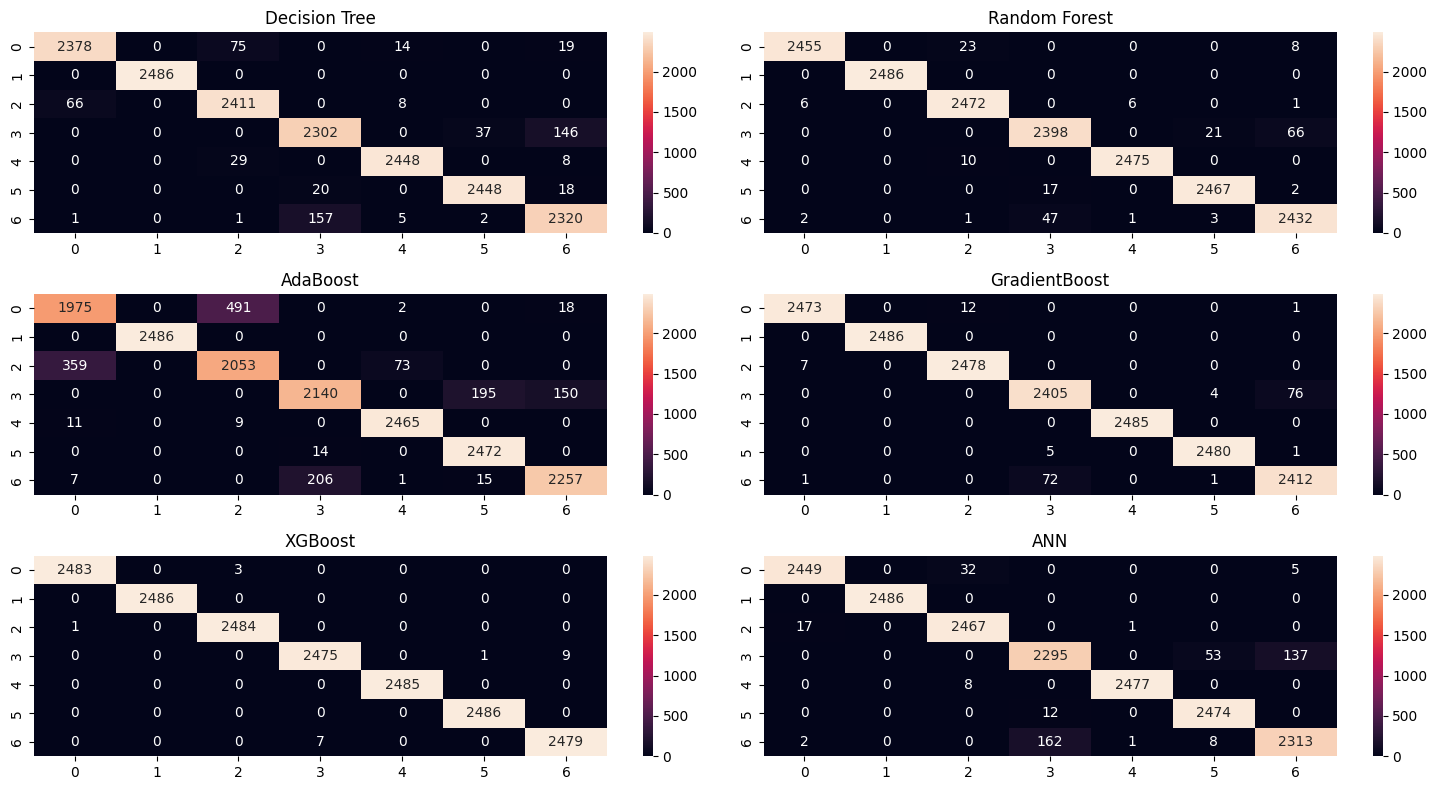

In [52]:
fig,ax=plt.subplots(3,2,figsize=(15,8))
ax=ax.flatten()
i=0
for m,c in zip(mods,cmt):
    sns.heatmap(c,annot=True,ax=ax[i],fmt='d')
    ax[i].set_title(m)
    i+=1
plt.tight_layout()
plt.show()

In [53]:
tr=pd.DataFrame({'Models':mods,'Accuracy':at,'Precision':pt,'Recall':rt,'F1 Score':f1t})
tr.sort_values(by=['Accuracy','Precision','Recall','F1 Score'],ascending=False)

,Models,Accuracy,Precision,Recall,F1 Score
4,XGBoost,0.998793,0.998793,0.998793,0.998793
3,GradientBoost,0.989655,0.989657,0.989655,0.989655
1,Random Forest,0.987700,0.987721,0.987700,0.987699
5,ANN,0.974826,0.974738,0.974826,0.974757
0,Decision Tree,0.965170,0.965259,0.965170,0.965196
2,AdaBoost,0.910857,0.910454,0.910857,0.910226


## Testing

In [54]:
print('CLASSIFICATION REPORTS:\n\n\n')
for m,c in zip(mods,cr):
    print(m,'\n',c,'\n\n')

CLASSIFICATION REPORTS:



Decision Tree 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       621
           1       1.00      1.00      1.00       621
           2       0.95      0.97      0.96       622
           3       0.93      0.92      0.92       622
           4       0.99      0.98      0.98       622
           5       0.99      0.99      0.99       621
           6       0.91      0.93      0.92       621

    accuracy                           0.96      4350
   macro avg       0.96      0.96      0.96      4350
weighted avg       0.96      0.96      0.96      4350
 


Random Forest 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       621
           1       1.00      1.00      1.00       621
           2       0.96      0.98      0.97       622
           3       0.94      0.92      0.93       622
           4       0.99      0.99      0.99       622
           5    

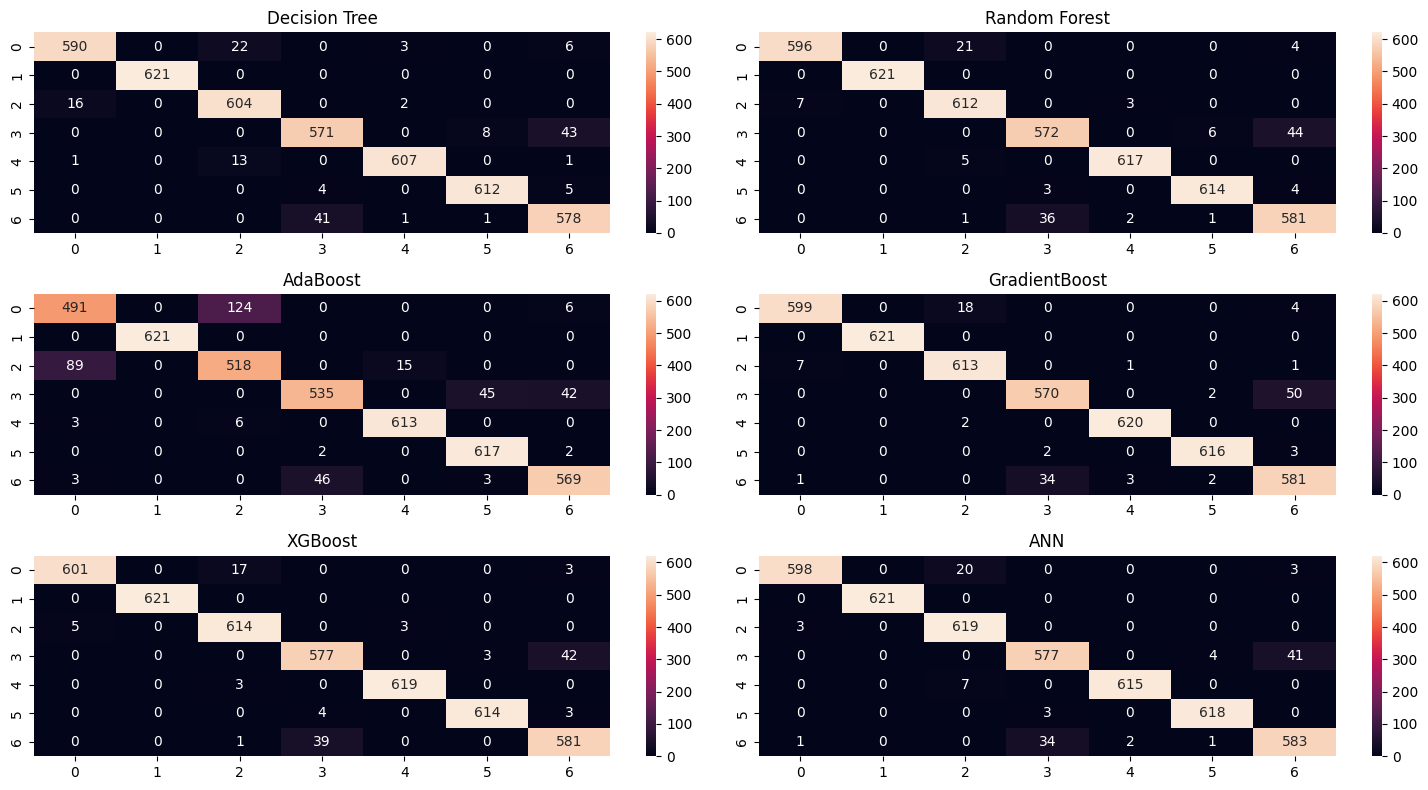

In [55]:
fig,ax=plt.subplots(3,2,figsize=(15,8))
ax=ax.flatten()
i=0
for m,c in zip(mods,cm):
    sns.heatmap(c,annot=True,ax=ax[i],fmt='d')
    ax[i].set_title(m)
    i+=1
plt.tight_layout()
plt.show()

In [56]:
te=pd.DataFrame({'Models':mods,'Accuracy':a,'Precision':p,'Recall':r,'F1 Score':f1})
te.sort_values(by=['Accuracy','Precision','Recall','F1 Score'],ascending=False)

,Models,Accuracy,Precision,Recall,F1 Score
5,ANN,0.972644,0.972831,0.972644,0.972642
4,XGBoost,0.971724,0.971899,0.971724,0.971768
3,GradientBoost,0.970115,0.970311,0.970115,0.970134
1,Random Forest,0.968506,0.968688,0.968506,0.968519
0,Decision Tree,0.961609,0.961852,0.961609,0.961665
2,AdaBoost,0.911264,0.911147,0.911264,0.910762


****
# ROC Curve
****

Processing Decision Tree...


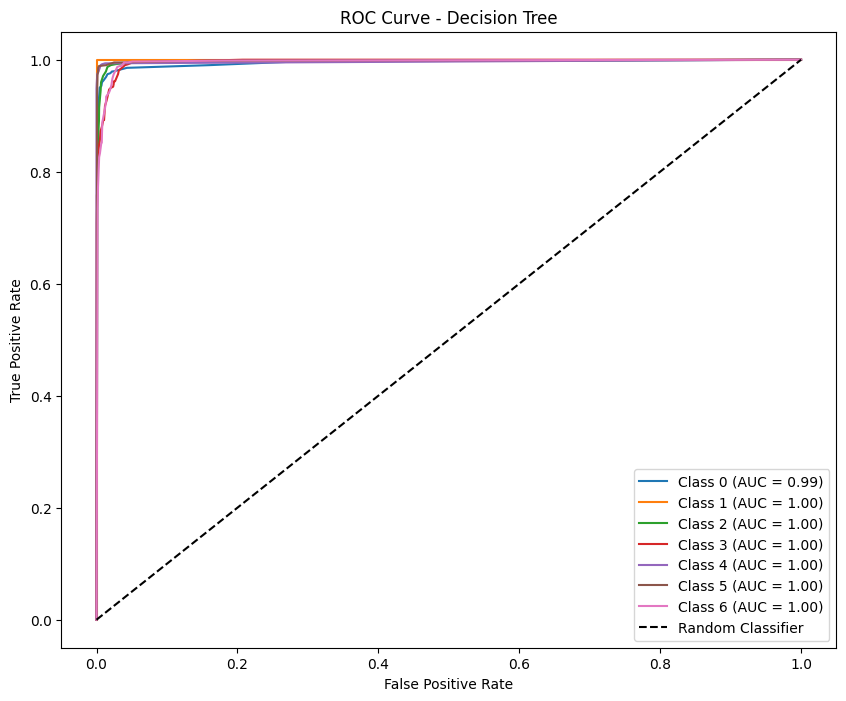

Processing Random Forest...


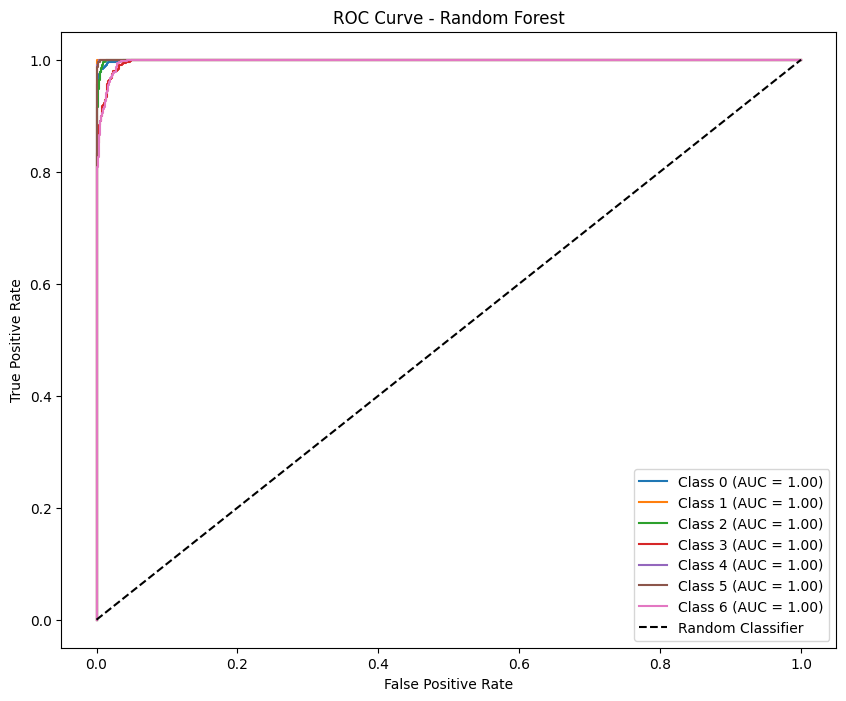

Processing AdaBoost...


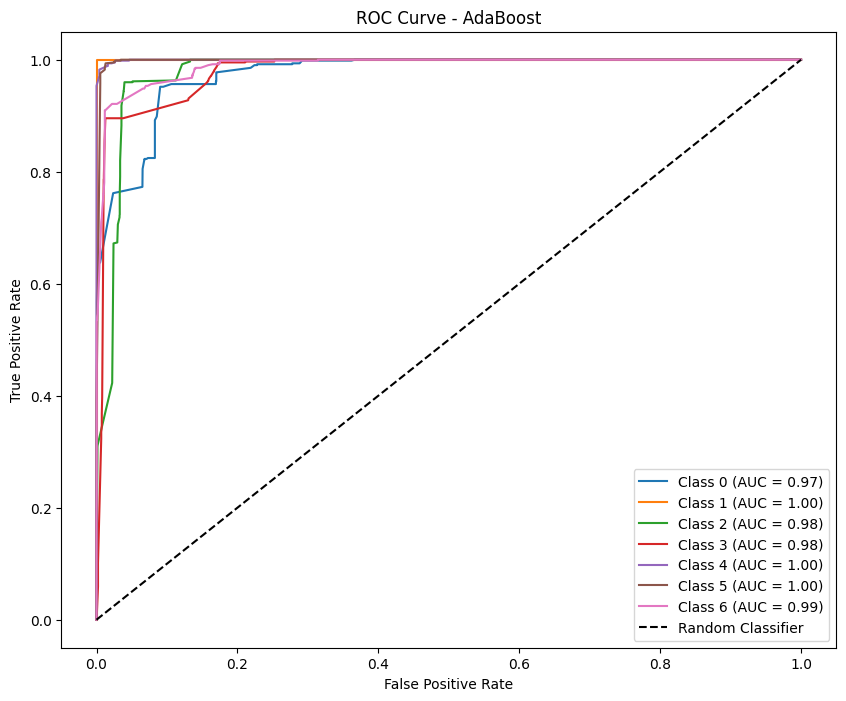

Processing GradientBoost...


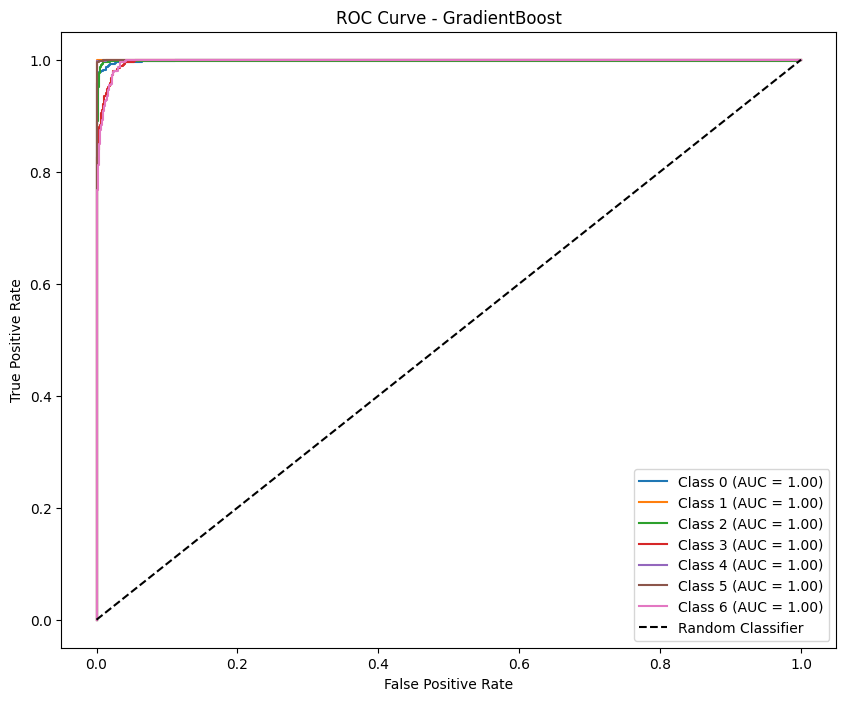

Processing XGBoost...


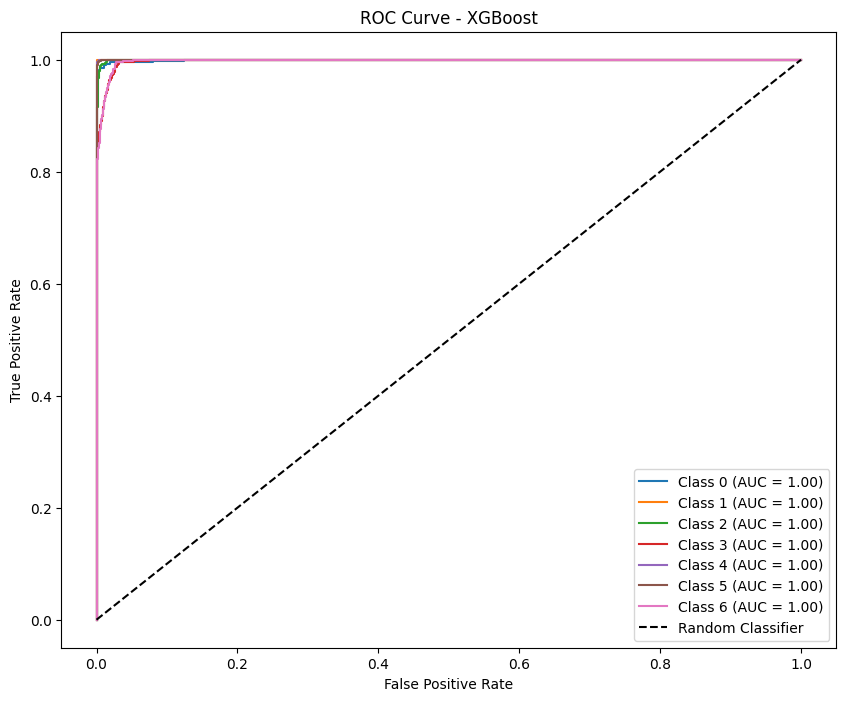

Processing ANN...
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


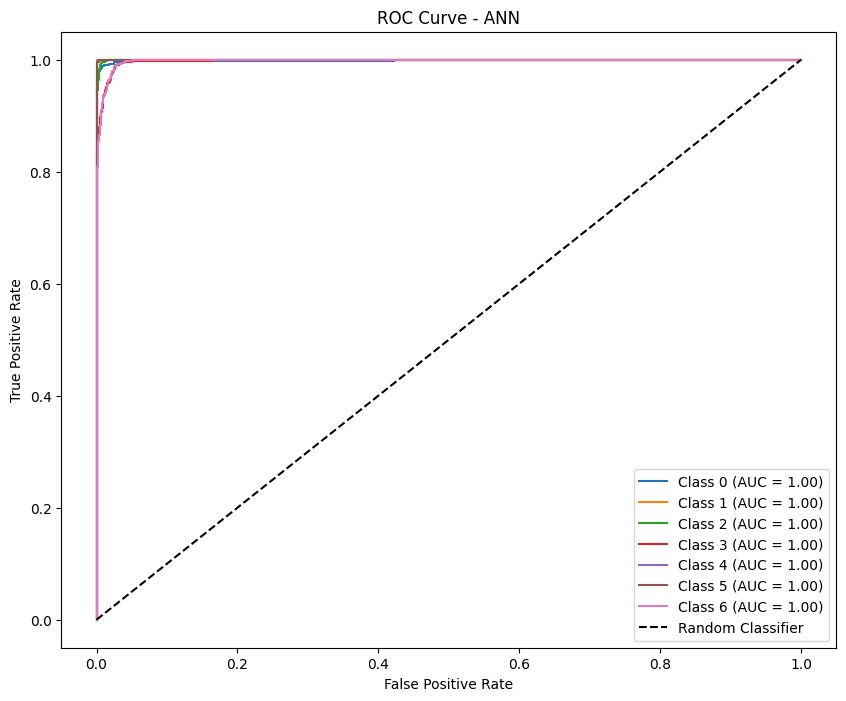

In [57]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming ANN model is a Keras/TensorFlow model
from tensorflow.keras.models import Sequential  # Import if using Keras

# Define your trained models
models = [ndt, nrf, nada, ngb, nxgb, model]  # Include your ANN model here
model_names = ['Decision Tree', 'Random Forest', 'AdaBoost', 
               'GradientBoost', 'XGBoost', 'ANN']

# Binarize the target labels for multiclass ROC
y_te_bin = label_binarize(y_te, classes=np.unique(y_te))
n_classes = y_te_bin.shape[1]  # Number of classes

# Loop through each model and plot ROC curves
for model, name in zip(models, model_names):
    plt.figure(figsize=(10, 8))
    print(f"Processing {name}...")

    # Handle ANN separately (Keras models use `predict` instead of `predict_proba`)
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(x_te)  # Works for sklearn models
    elif isinstance(model, Sequential) or hasattr(model, 'predict'):  # Handle ANN
        y_prob = model.predict(x_te)  # Works for Keras models

    # Check if y_prob has the correct shape
    if y_prob.shape[1] != n_classes:
        raise ValueError(f"Model {name} output shape mismatch. Expected {n_classes}, got {y_prob.shape[1]}")

    # Compute and plot ROC for each class
    for class_idx in range(n_classes):  
        fpr, tpr, _ = roc_curve(y_te_bin[:, class_idx], y_prob[:, class_idx])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_idx} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()


****
# Feedback and Suggestions 
****

**Kindly provide feedback and suggestions to improve this notebook**

**If you liked this or you found the notebook helpful kindly Upvote :)**